In this section of the code, we compare the two time series datasets that we created before. The first dataset contained the traffic flow information per path with respect to the rules of Strict Path Queries (SPQ), while the second time series dataset contains the raw traffic flow information per path, without the use of the SPQs.

<b>Note, the definition of the Strict Path Queries is in the following link:</b>https://dl.acm.org/doi/abs/10.1145/2666310.2666413

In [1]:
# measure execution time
%load_ext autotime

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# standard library imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

time: 1.69 s (started: 2023-08-04 16:22:47 +03:00)


### Phase 3: Compare the time series datasets
In this step, the following commands are executed:
- Load the two time series datasets
- Preprocess the datasets
- Visualize the aggregated traffic flow information per timestamp

#### Step 1: Load the time series traffic flow datasets
In this step we are doing the following operations:
- Read the data
- Change the name of columns

In [2]:
# read the two datasets
time_series_SPQ = pd.read_csv('C:/Users/SK/Desktop/Πτυχιακή/Files/time_series_SPQ.txt')
time_series_no_SPQ = pd.read_csv('C:/Users/SK/Desktop/Πτυχιακή/Files/time_series_without_SPQ.txt')

# this list contains the column names
columns = ["Taxi ID","Traj ID","Path","Length"]

# generate the columns of the datasets
i =4
while(True):
    if i == 4:
        columns.append(pd.to_datetime('2008-05-18 00:00:00'))
    else:
        columns.append(columns[i-1] + timedelta(seconds=1800))
    
    if (columns[i]>=pd.to_datetime('2008-05-24 23:59:59.000130')):
        break
    
    i+=1

# delete the last timestamp
columns.pop()

# assign new column names to our dataframes
time_series_SPQ.columns = columns
time_series_no_SPQ.columns = columns

time: 171 ms (started: 2023-08-04 16:22:48 +03:00)


#### Step 2: Preprocess the time series datasets
In this step we are doing the following operations:
- Reshape them to long format using melt function
- Preprocess the data types of each column

In [3]:
# define a list of columns that will be used as identifiers during the melt operation
id_cols = ['Taxi ID','Traj ID', 'Path', 'Length']

# apply melt function to the first dataset (time_series_SPQ)
# get the column names from the third column onwards as time_cols
time_cols = time_series_SPQ.iloc[:,2:].columns

# perform the melt operation on the first dataset
# it reshapes the dataframe from wide format to long format, 
# keeping the columns in id_cols as identifiers, and the rest of the columns in time_cols are melted into two new columns.
time_series_SPQ = time_series_SPQ.melt(id_vars=id_cols, value_vars=time_cols, var_name='Time Column', value_name='Traffic Flow')

# convert the 'Time Column' to datetime format to handle time-related data
time_series_SPQ['Time Column'] = pd.to_datetime(time_series_SPQ['Time Column'])

time: 250 ms (started: 2023-08-04 16:22:49 +03:00)


In [4]:
# apply melt function to the second dataset (time_series_no_SPQ)
# re-define the id_cols since the previous id_cols were modified in the first melt operation
id_cols = ['Taxi ID','Traj ID', 'Path', 'Length']

# get the column names from the third column onwards as time_cols for the second dataset
time_cols = time_series_no_SPQ.iloc[:,2:].columns

# perform the melt operation on the second dataset
# similar to the previous melt operation, it reshapes the dataframe from wide format to long format.
time_series_no_SPQ = time_series_no_SPQ.melt(id_vars=id_cols, value_vars=time_cols, var_name='Time Column', value_name='Traffic Flow')

# convert the 'Time Column' to datetime format for the second dataset
time_series_no_SPQ['Time Column'] = pd.to_datetime(time_series_no_SPQ['Time Column'])

# sort rows by 'Path' and 'Time Column' for both datasets in ascending order
time_series_SPQ.sort_values(by=['Path','Time Column'], inplace=True)
time_series_no_SPQ.sort_values(by=['Path','Time Column'], inplace=True)

time: 765 ms (started: 2023-08-04 16:22:49 +03:00)


#### Step 3: Make Visualizations

In [5]:
import seaborn as sns

time: 969 ms (started: 2023-08-04 16:22:50 +03:00)


In [6]:
# group by the 'Time Column' (timestamp/index) and calculate the sum of the 'Traffic Flow' 
# for each timestamp in the 'time_series_SPQ' DataFrame.
grouped_df_SPQ = time_series_SPQ['Traffic Flow'].groupby(time_series_SPQ['Time Column']).sum()

# convert the resulting Series to a DataFrame, with the timestamp (index) as a new column.
grouped_df_SPQ = pd.DataFrame(grouped_df_SPQ, index=grouped_df_SPQ.index)

time: 31 ms (started: 2023-08-04 16:22:51 +03:00)


In [7]:
# group by the 'Time Column' (timestamp/index) and calculate the sum of the 'Traffic Flow' 
# for each timestamp in the 'time_series_no_SPQ' DataFrame.
grouped_df_no_SPQ = time_series_no_SPQ['Traffic Flow'].groupby(time_series_no_SPQ['Time Column']).sum()

# convert the resulting Series to a DataFrame, with the timestamp (index) as a new column.
grouped_df_no_SPQ = pd.DataFrame(grouped_df_no_SPQ, index=grouped_df_no_SPQ.index)

time: 31 ms (started: 2023-08-04 16:22:51 +03:00)


In [8]:
### Add additional time information to the 'grouped_df_SPQ' DataFrame based on the index (timestamp). ###

# extract the hour from the timestamp (index) and create a new column 'hour'.
grouped_df_SPQ['hour'] = grouped_df_SPQ.index.hour

# extract the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday) from the timestamp (index) 
# and create a new column 'dayofweek'.
grouped_df_SPQ['dayofweek'] = grouped_df_SPQ.index.dayofweek

time: 15 ms (started: 2023-08-04 16:22:51 +03:00)


In [9]:
### Add additional time information to the 'grouped_df_no_SPQ' DataFrame based on the index (timestamp). ###

# extract the hour from the timestamp (index) and create a new column 'hour'.
grouped_df_no_SPQ['hour'] = grouped_df_no_SPQ.index.hour

# extract the day of the week (0: Monday, 1: Tuesday, ..., 6: Sunday) from the timestamp (index) 
# and create a new column 'dayofweek'.
grouped_df_no_SPQ['dayofweek'] = grouped_df_no_SPQ.index.dayofweek

time: 16 ms (started: 2023-08-04 16:22:51 +03:00)


##### The code below creates a line plot to visualize the trend of total traffic flow over time in the 'SPQ' dataset.

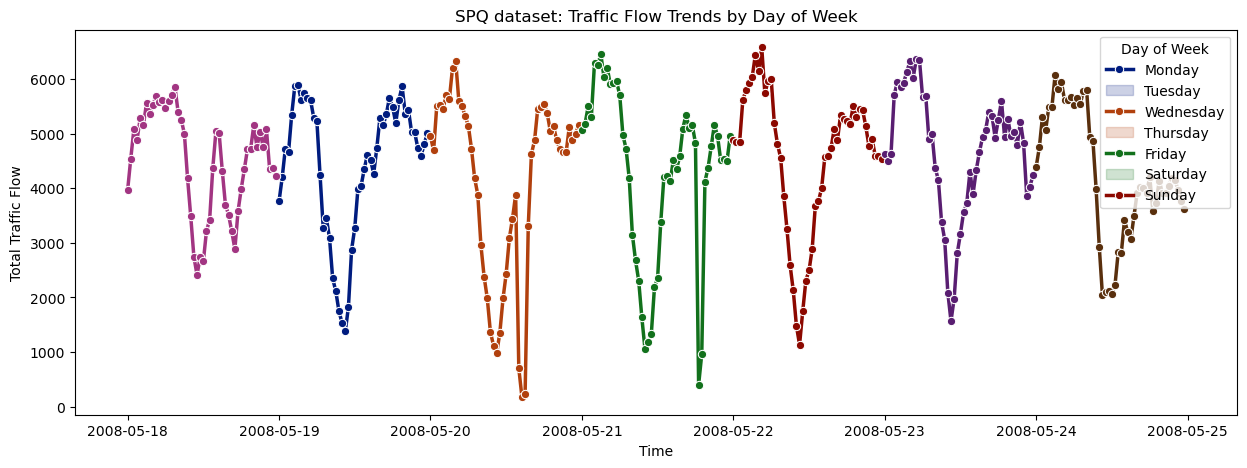

time: 657 ms (started: 2023-08-04 16:22:51 +03:00)


In [10]:
# create a custom dark color palette with 8 colors using Seaborn's color_palette function.
dark_palette = sns.color_palette('dark', n_colors=8)

# create a plot to visualize the results.
plt.figure(figsize=(15, 5))
sns.lineplot(data=grouped_df_SPQ, x=grouped_df_SPQ.index, y='Traffic Flow', hue='dayofweek', marker='o', palette=dark_palette, linewidth=2.5)

# set the labels for the x-axis and y-axis.
plt.xlabel('Time')
plt.ylabel('Total Traffic Flow')

# set the title for the plot.
plt.title('SPQ dataset: Traffic Flow Trends by Day of Week')

# set the legend title.
plt.legend(title='Day of Week', loc='upper right', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Display the plot.
plt.show()

##### The code below creates a line plot to visualize the trend of total traffic flow over time in the 'No SPQ' dataset.

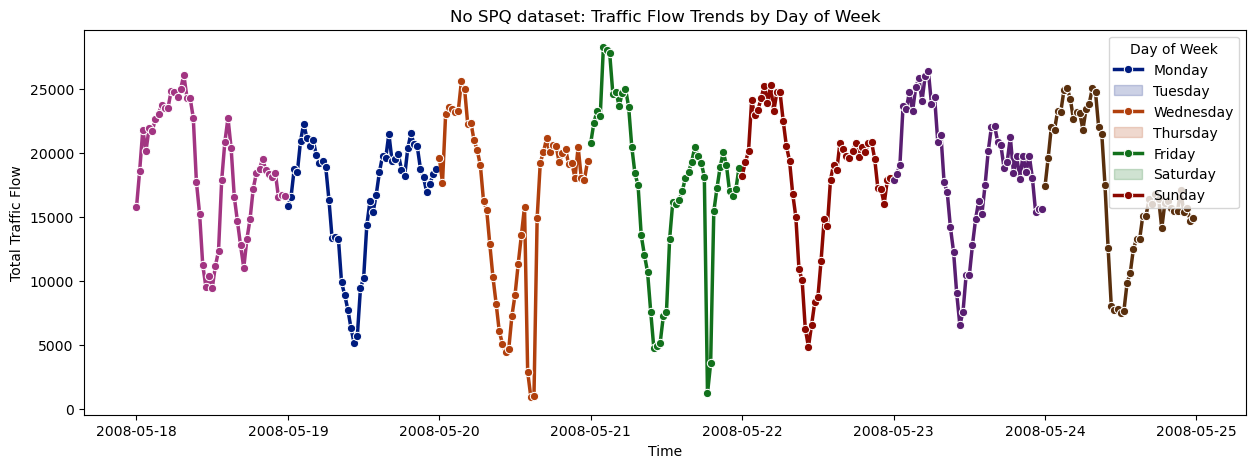

time: 500 ms (started: 2023-08-04 16:22:51 +03:00)


In [11]:
# create a custom dark color palette with 8 colors using Seaborn's color_palette function.
dark_palette = sns.color_palette('dark', n_colors=8)

# create a plot to visualize the results.
plt.figure(figsize=(15, 5))
sns.lineplot(data=grouped_df_no_SPQ, x=grouped_df_no_SPQ.index, y='Traffic Flow', hue='dayofweek', marker='o', palette=dark_palette, linewidth=2.5)

# set the labels for the x-axis and y-axis.
plt.xlabel('Time')
plt.ylabel('Total Traffic Flow')

# set the title for the plot.
plt.title('No SPQ dataset: Traffic Flow Trends by Day of Week')

# set the legend title.
plt.legend(title='Day of Week', loc='upper right', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Display the plot.
plt.show()

##### The code below creates a plot to visualize the sum of traffic flow over time for two datasets: grouped_df_SPQ and grouped_df_no_SPQ.

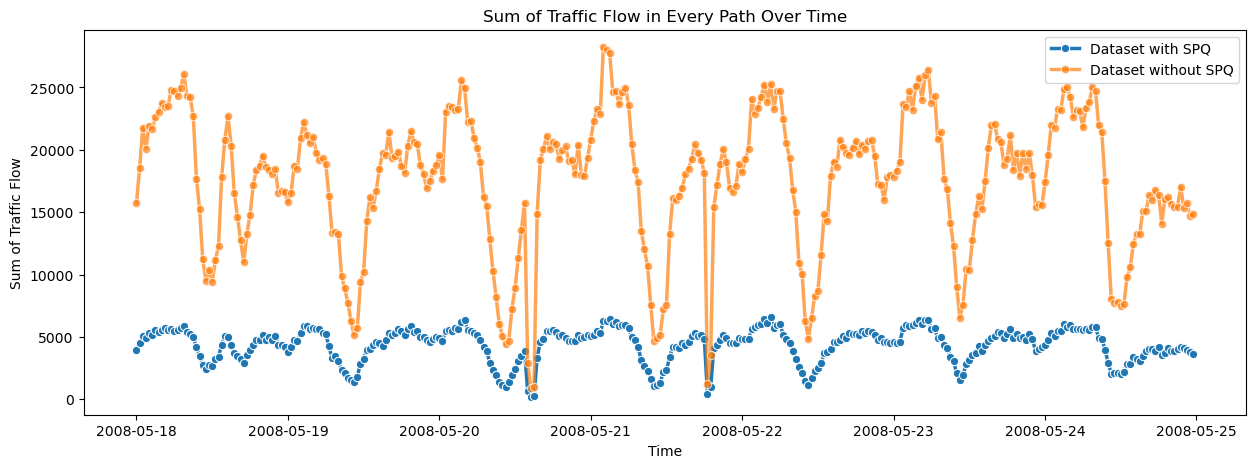

time: 469 ms (started: 2023-08-04 16:22:52 +03:00)


In [12]:
# create a plot to visualize the results
plt.figure(figsize=(15, 5))

# plot the sum of traffic flow over time for 'grouped_df_SPQ' dataset
sns.lineplot(data=grouped_df_SPQ, x=grouped_df_SPQ.index, y='Traffic Flow', marker='o', linewidth=2.5, label='Dataset with SPQ')

# plot the sum of traffic flow over time for 'grouped_df_no_SPQ' dataset
sns.lineplot(data=grouped_df_no_SPQ, x=grouped_df_no_SPQ.index, y='Traffic Flow', marker='o', linewidth=2.5, alpha=0.7, label='Dataset without SPQ')

# set the labels for the x-axis and y-axis
plt.xlabel('Time')
plt.ylabel('Sum of Traffic Flow')

# set the title for the plot
plt.title('Sum of Traffic Flow in Every Path Over Time')

# add a legend to distinguish between the two datasets
plt.legend(loc='upper right')

# display the plot
plt.show()